<a href="https://colab.research.google.com/github/ThaysonScript/projeto_rag_llama/blob/main/rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando chaves de api

In [8]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 24.3 MB/s eta 0:00:00


In [4]:
!pip install langchain-groq
!pip install python-dotenv
!pip install langchain_community
!pip install langchain_text_splitter
!pip install langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.2/413.2 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.33
    Uninstalling langchain-core-0.3.33:
      Successfully uninstalled langchain-core-0.3.33
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.5
    Uninstalling langchain-text-splitters-0.3.5:
      Successfully uninstalled langchain-text-splitters-0.3.5
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.17
    Uninstalling langchain-0.3.17:
      Successfully uninstalled langchain-0.3.17
ERROR: Could not find a vers

In [5]:
from dotenv import load_dotenv
import os

os.environ['GROQ_API_KEY'] = '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'

# Definindo e chamando modelos que vão ser usados

In [6]:
from langchain_groq import ChatGroq

class Modelos:
    def __init__(self):
        self.models = {
            'google_gemma': 'gemma2-9b-it',
            'meta_llama': 'llama-3.3-70b-versatile',
            'deep_seek': 'deepseek-r1-distill-qwen-32b'
        }

        self.google_llm = ChatGroq(model=self.models['google_gemma'])
        self.meta_llm = ChatGroq(model=self.models['meta_llama'])
        self.deep_seek_llm = ChatGroq(model=self.models['deep_seek'])

    def imprimir_llms_carregadas(self):
        print(f'GOOGLE_LLM: {self.google_llm}\n')
        print(f'META_LLM: {self.meta_llm}\n')
        print(f'DEEP_SEEK_LLM: {self.deep_seek_llm}\n')

new_obj = Modelos()
new_obj.imprimir_llms_carregadas()

GOOGLE_LLM: client=<groq.resources.chat.completions.Completions object at 0x7d9de20972d0> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7d9de1eb6310> model_name='gemma2-9b-it' model_kwargs={} groq_api_key=SecretStr('**********')

META_LLM: client=<groq.resources.chat.completions.Completions object at 0x7d9de1ed40d0> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7d9de1ee0c90> model_name='llama-3.3-70b-versatile' model_kwargs={} groq_api_key=SecretStr('**********')

DEEP_SEEK_LLM: client=<groq.resources.chat.completions.Completions object at 0x7d9de1ee32d0> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7d9de1ef17d0> model_name='deepseek-r1-distill-qwen-32b' model_kwargs={} groq_api_key=SecretStr('**********')



# Carregar Lista de PDFS dos Prospectos

In [9]:
from langchain_community.document_loaders import PyPDFLoader
import os

# Lista para armazenar os documentos carregados
caminho_pdf='/content/farmacia_e_drogaria_nissei_20200904_Minuta%20do%20Prospecto%20Preliminar.pdf'
docs_list = []
i = 1

loader = PyPDFLoader(caminho_pdf)

print(f'loader: {loader}\n\n')

docs = await loader.aload()

print(f'docs_loader: {docs[0].page_content[:100]}\n\n')
print(docs[0].metadata)

docs_list.append(docs)

print(i)
# i += 1


loader: <langchain_community.document_loaders.pdf.PyPDFLoader object at 0x7d9de219bbd0>


docs_loader: ESTE DOCUMENTO É UMA MINUTA INICIAL SUJEITA A ALTERAÇÕES E COMPLEMENTAÇÕES, TENDO SIDO ARQUIVADO NA 


{'producer': 'Acrobat Distiller 20.0 (Windows)', 'creator': 'PScript5.dll Version 5.2.2', 'creationdate': '2020-09-04T17:38:56-03:00', 'author': '', 'moddate': '2020-09-04T17:39:50-03:00', 'title': '', 'source': '/content/farmacia_e_drogaria_nissei_20200904_Minuta%20do%20Prospecto%20Preliminar.pdf', 'total_pages': 745, 'page': 0, 'page_label': '1'}
1


# Dividir Texto em partes menores

In [10]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1024,  # chunk size (characters)
    chunk_overlap=150,  # chunk overlap (characters)
    add_start_index=True,  # track index in original document
)
all_splits = text_splitter.split_documents(docs_list[0])

print(len(all_splits))  # ler tamanho total de divisões
len(all_splits[0].page_content)  # ler tamanho total de divisões da pagina 0

all_splits[10].metadata   # metadados do doc

2375


{'producer': 'Acrobat Distiller 20.0 (Windows)',
 'creator': 'PScript5.dll Version 5.2.2',
 'creationdate': '2020-09-04T17:38:56-03:00',
 'author': '',
 'moddate': '2020-09-04T17:39:50-03:00',
 'title': '',
 'source': '/content/farmacia_e_drogaria_nissei_20200904_Minuta%20do%20Prospecto%20Preliminar.pdf',
 'total_pages': 745,
 'page': 0,
 'page_label': '1',
 'start_index': 8784}

# Instanciando Embedding

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

print(embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model_name='sentence-transformers/all-mpnet-base-v2' cache_folder=None model_kwargs={} encode_kwargs={} multi_process=False show_progress=False


# Usando InMemoryVectorStore para armazenar os embeddings

In [12]:
from langchain_core.vectorstores import InMemoryVectorStore
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

# Criando o vector store na memória (evita FAISS caso não queira instalar)
vector_store = InMemoryVectorStore(embeddings)

# Configuração do tamanho do lote e número de threads
batch_size = 4  # Processa poucos documentos por vez para reduzir o uso de RAM
num_threads = 4  # Número de lotes processados simultaneamente
document_ids = []

# Função para processar um lote e armazenar no vector store
def process_batch(start_idx):
    batch = all_splits[start_idx : start_idx + batch_size]
    return vector_store.add_documents(documents=batch)

# Cria um pool de threads para paralelizar a execução
with ThreadPoolExecutor(max_workers=num_threads) as executor:
    futures = {executor.submit(process_batch, i): i for i in range(0, len(all_splits), batch_size)}

    for future in tqdm(as_completed(futures), total=len(futures), desc="Processando lotes em paralelo"):
        document_ids.append(future.result())  # Armazena os IDs processados

print("✅ Processamento concluído com paralelismo!")

Processando lotes em paralelo: 100%|██████████| 594/594 [00:54<00:00, 10.80it/s]

✅ Processamento concluído com paralelismo!


# usando a gpu

In [ ]:
pip install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/rocm6.2/

In [ ]:
import torch

# Verifica se a GPU AMD (ROCm) está disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Processa os batches na GPU com PyTorch
def process_batch_on_gpu(batch):
    batch_tensor = torch.tensor(batch, dtype=torch.float32).to(device)
    output_tensor = batch_tensor * 2  # Exemplo de operação
    return output_tensor.cpu().numpy().tolist()

document_ids = [process_batch_on_gpu(all_splits[i:i+batch_size]) for i in range(0, len(all_splits), batch_size)]

print("✅ Processamento concluído na GPU AMD via PyTorch!")


# Prompt

In [13]:
from langchain import hub

# Define prompt for question-answering
prompt = hub.pull("rlm/rag-prompt")

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [16]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 4.7 MB/s eta 0:00:00


In [21]:
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

In [22]:
# Define state for application
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str


# Define application steps
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = new_obj.deep_seek_llm.invoke(messages)
    return {"answer": response.content}


# Compile application and test
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

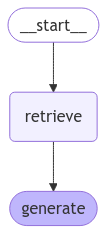

In [23]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
result = graph.invoke({"question": "me de informações gerais e resumidas do documento"})

# print(f'Context: {result["context"]}\n\n')
# print(f'Answer: {result["answer"]}')
print(result)
print('\n\n')
print(result["answer"])

{'question': 'me de informações gerais e resumidas do documento', 'context': [Document(id='59a65557-6812-4861-ab8b-cdb1bfd985ec', metadata={'producer': 'Acrobat Distiller 20.0 (Windows)', 'creator': 'PScript5.dll Version 5.2.2', 'creationdate': '2020-09-04T17:38:56-03:00', 'author': '', 'moddate': '2020-09-04T17:39:50-03:00', 'title': '', 'source': '/content/farmacia_e_drogaria_nissei_20200904_Minuta%20do%20Prospecto%20Preliminar.pdf', 'total_pages': 745, 'page': 8, 'page_label': '9', 'start_index': 919}, page_content='Código de Negociação das \nAções  \nna B3 \nAs Ações serão listadas no segmento do Novo Mercado de \nGovernança Corporativa da B3 sob o código “NISS3”, a partir \ndo primeiro dia útil imediatament e posterior à disponibilização \ndo Anúncio de Início. \nJornais nos quais divulga \ninformações \nAs publicações realizadas pela Companhia em decorrência da \nLei das Sociedades por Ações são divulgadas no DOEPR e no \njornal “Bem Paraná”.  \nFormulário de Referência Informaçõ